<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed

In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-06-15 16:44:21--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24157 (24K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  23.59K  --.-KB/s    in 0.002s  

2021-06-15 16:44:22 (11.6 MB/s) - ‘data_phot.csv’ saved [24157/24157]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [4]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [5]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4) 
  

In [6]:
data_sample_d.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,192.947230,192.938098,192.923131,192.901782,192.981328,192.921046,192.916095,192.910687,192.962793,192.892213,192.919111,193.001989,193.017863,192.971828,193.030168,192.984464,192.978633,192.978195,192.977478,192.917381,192.989620,192.873815,192.975867,192.996467,192.914937,192.978873,192.937958,193.023903,192.943598,192.947563,192.915661,192.935456,193.027290,192.914150,192.945762,192.947581,193.033010,192.948747,192.928091,192.932925,...,192.946317,192.927332,192.943440,192.938275,193.052567,192.968604,192.957437,192.986800,192.991413,192.944637,192.978059,192.922013,192.957784,192.956062,192.934162,193.012965,193.012765,193.048397,193.009063,193.012002,192.958594,192.991325,192.984770,192.930265,192.936257,192.975089,192.892554,193.008728,192.945257,192.951494,192.985760,192.997996,192.972507,192.940500,193.006005,192.977517,192.961546,192.958157,192.943958,192.911985
1,106.525702,106.524273,106.589118,106.496789,106.543217,106.518765,106.514688,106.527374,106.518244,106.510967,106.515434,106.525825,106.510489,106.504933,106.525126,106.532745,106.547452,106.507684,106.524657,106.515613,106.557209,106.492028,106.516800,106.539949,106.514028,106.564374,106.543860,106.536237,106.508420,106.516281,106.562832,106.523232,106.544889,106.509389,106.527448,106.556622,106.531188,106.531371,106.515990,106.523004,...,106.487362,106.535140,106.519808,106.593436,106.513727,106.539826,106.552121,106.516916,106.510463,106.558123,106.530692,106.533977,106.509114,106.519351,106.530128,106.498859,106.523838,106.546219,106.528778,106.527088,106.495860,106.525655,106.507584,106.511160,106.510245,106.503294,106.479376,106.517077,106.519670,106.507554,106.551880,106.511569,106.508974,106.554990,106.537623,106.532643,106.543982,106.554104,106.557055,106.547767
2,40.706461,40.706286,40.706354,40.706269,40.706330,40.706252,40.706334,40.706368,40.706262,40.706482,40.706395,40.706335,40.706497,40.706357,40.706290,40.706682,40.706175,40.706450,40.706376,40.706273,40.706476,40.706383,40.706214,40.706333,40.706400,40.706318,40.706270,40.706367,40.706378,40.706256,40.706446,40.706312,40.706426,40.706442,40.706448,40.706367,40.706322,40.706420,40.706255,40.706335,...,40.706287,40.706408,40.706366,40.706413,40.706356,40.706358,40.706338,40.706566,40.706267,40.706258,40.706531,40.706244,40.706498,40.706372,40.706362,40.706384,40.706374,40.706352,40.706354,40.706383,40.706399,40.706244,40.706347,40.706513,40.706393,40.706414,40.706249,40.706337,40.706328,40.706353,40.706378,40.706384,40.706525,40.706396,40.706317,40.706419,40.706411,40.706415,40.706349,40.706455
3,148.681383,148.683563,148.687598,148.669793,148.689389,148.681616,148.667252,148.675407,148.677813,148.668836,148.668516,148.664923,148.682263,148.671955,148.669980,148.666737,148.669263,148.668626,148.676797,148.661167,148.669255,148.695757,148.679788,148.656223,148.685614,148.662078,148.661564,148.666561,148.674329,148.663039,148.679687,148.671834,148.662122,148.675981,148.656041,148.687083,148.676339,148.672052,148.673832,148.677719,...,148.672067,148.661514,148.664721,148.665010,148.686337,148.650483,148.672545,148.679455,148.662018,148.666388,148.687135,148.679038,148.679510,148.679513,148.666627,148.665164,148.672957,148.667525,148.671191,148.682648,148.669786,148.675410,148.672953,148.669777,148.666990,148.679040,148.694506,148.660615,148.675087,148.662086,148.672730,148.668885,148.675403,148.678601,148.658872,148.667462,148.665864,148.677396,148.664736,148.663741
4,201.794191,201.861787,201.852394,201.861832,201.865114,201.892465,201.840662,201.846083,201.833942,201.844649,201.882643,201.872656,201.862413,201.875425,201.798706,201.857463,201.871978,201.852978,201.886695,201.844550

In [ ]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_K[i]

M()

In [11]:
#build RMS(Mag)
for i in range(208) : 
  if round(data_phot['Kepmag'][i]) < 12 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['Kepmag'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['Kepmag'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['Kepmag'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['Kepmag'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.017
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.015
18 0.015
19 0.015
20 0.04
21 0.025
22 0.015
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.015
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.015
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.015
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.015
98 0.04
99 0.04
100 0.015
101 0.015
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [13]:
#build sd_r
data_phot['sd_r'] = data_phot['r'] * data_phot['rms']

In [14]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [15]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,16.740621,16.001199,18.315421,17.329163,15.518133,17.609446,16.871056,17.559453,17.441147,16.026664,16.976190,16.720772,17.039415,16.836928,18.102743,16.264638,18.543052,17.807421,17.112875,17.026216,17.156728,16.891897,17.328029,18.021961,17.202529,17.529106,18.593051,16.625801,17.934376,16.458878,16.568134,17.529262,17.255548,16.697594,16.530249,16.782546,16.449617,18.655653,16.341012,17.592836,...,16.970277,17.058568,16.668008,17.279554,16.551772,16.900046,17.365454,16.830264,17.198592,16.202467,15.950727,15.692050,17.065260,16.757958,17.004389,17.287100,17.470756,15.518612,16.816651,16.830946,16.840668,15.655595,17.270781,15.543117,17.454685,16.370488,17.620475,17.511128,17.571529,16.712180,17.246911,16.815199,17.190008,16.655567,17.710040,16.399144,17.413506,16.599632,17.273418,16.446481
1,21.124588,18.807934,18.971998,18.396974,19.750943,18.766511,16.661664,18.507272,19.169169,18.517750,18.054867,18.868405,17.467203,18.613922,19.200845,19.660086,20.156998,18.132913,19.822220,19.710178,18.495680,18.297785,18.606529,21.132575,18.270732,20.543029,19.887412,19.308126,18.565991,16.993977,20.563262,18.262469,19.354412,15.908922,19.254682,18.714109,19.920111,19.562905,20.676206,19.887321,...,18.390591,18.892830,19.668728,18.206300,20.231192,18.594816,20.398524,18.805555,18.154019,21.020992,18.922062,18.509223,16.995699,20.017009,17.110807,17.623540,18.787817,18.789150,16.779766,18.986244,17.775966,20.384326,18.723219,19.003843,19.077206,20.921242,19.420117,19.264097,20.916403,18.769936,18.891424,19.939296,19.065198,17.323281,19.596030,19.129925,16.979150,18.877467,18.146065,16.734046
2,15.139546,15.026168,15.558425,14.721410,14.781618,14.676745,15.067446,14.948292,15.023143,15.312030,15.050104,15.666995,15.273767,14.612411,14.978301,15.215993,14.653214,15.061246,14.630327,14.786180,14.747509,14.648533,14.970097,15.027357,14.645583,15.107379,14.844745,15.086355,14.751778,14.662491,15.447325,14.865883,15.373855,15.075018,15.096064,14.856816,14.853676,14.906675,14.518704,15.151543,...,15.355699,15.048663,14.745716,15.261185,15.177335,14.922565,14.493818,14.761068,15.208535,15.048630,15.002061,15.078076,15.015289,14.438103,15.016610,14.945570,15.354483,15.312583,14.942752,15.057503,14.913610,15.341296,14.758665,15.164220,15.214182,14.772412,14.887462,14.713876,14.819603,14.755317,15.050982,14.600734,15.277983,15.211389,14.923672,15.275638,14.541382,14.993389,15.099857,14.595584
3,16.704180,16.990574,16.595869,16.778470,16.472621,16.297672,17.115636,16.668958,16.167956,17.006568,17.206698,16.377814,16.884515,17.280378,16.933770,16.931680,16.905999,16.734031,17.056876,16.516327,15.767534,16.324219,17.125433,15.959537,16.121148,16.406241,16.989688,16.244898,16.673822,17.088335,16.903836,16.739018,17.010670,17.650497,16.748217,17.315545,17.324158,16.890458,16.728496,16.467977,...,16.721984,16.976663,17.154302,16.303123,16.730286,17.053046,16.099750,18.000868,16.500426,16.723448,16.491424,16.085776,17.738469,16.902808,16.209054,16.400414,16.306539,16.967793,17.616596,17.359488,17.043640,16.782150,16.257921,16.784306,16.596292,17.512277,16.844634,17.488571,17.077273,17.026696,16.429303,16.311458,16.370215,17.175452,16.202347,17.150545,16.774458,16.695363,16.161370,16.258774
4,16.021528,17.135309,16.797868,16.932627,16.419873,16.670487,16.824187,16.739562,16.130235,16.277216,17.087160,17.046833,16.500153,17.186170,16.561775,16.573879,16.870822,16.474069,16.406308,16.463842,16.642766,16.282071,16.330585,16.959438,16.310789,16.012677,16.845699,16.374986,16.979635,15.655538,16.397292,16.514577,16.731926,15.821991,16.636294,16.559014,16.677868,17.066007,16.761888,16.596923,...,15.956877,16.121303,16.762563,16.836468,16.338517,16.41

In [30]:
# find M_r
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
for i in range(208) :
  M_r[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [31]:
M_r = M_r.T
M_r['Median'] = np.median(M_r,axis=1)

In [32]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)

In [33]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']

In [34]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.259883,9.520564,11.834955,10.848937,9.037011,11.129002,10.390668,11.079126,10.960234,9.546545,10.495769,10.239418,10.557882,10.355913,11.621072,9.783481,12.061961,11.326334,10.631797,10.545814,10.675514,10.411986,10.846969,11.540669,10.722154,11.048012,12.112417,10.144200,11.453679,9.978136,10.087752,11.048656,10.773909,10.217229,10.049528,10.301804,9.967914,12.174898,9.860490,11.112259,...,10.419068,10.884602,10.349081,10.717356,9.721758,9.469642,9.211596,10.584403,10.277120,10.523798,10.805622,10.989281,9.036736,10.335217,10.349479,10.359803,9.174361,10.789620,9.062570,10.974071,9.889436,11.140352,11.029698,11.090813,10.231394,10.765740,10.333890,10.708986,10.174905,11.228641,9.918065,10.932607,10.118772,10.792717,9.966140,10.492548,9.776988,11.238043,-0.715559,0.745495
1,15.968109,13.651485,13.814227,13.241085,14.594108,13.610174,11.505411,13.350760,14.012842,13.361572,12.898598,13.711924,12.311035,13.457867,14.044379,14.503464,15.000076,12.976802,14.665763,14.553905,13.338559,13.141993,13.450232,15.975806,13.114492,15.385763,14.730563,14.151433,13.409865,11.837691,15.406027,13.106041,14.197543,10.752776,14.098168,13.557001,14.763521,14.406311,15.519925,14.730898,...,13.438050,15.241507,13.649256,12.997851,15.863852,13.765482,13.352576,11.839559,14.860660,11.954238,12.467609,13.631377,13.632253,11.623225,13.829738,12.620096,15.227849,13.567110,13.847661,13.921043,15.765220,14.264583,14.107794,15.760048,13.613828,13.734412,14.783106,13.909061,12.166206,14.439309,13.973305,11.822299,13.720410,12.988947,11.577118,13.622493,12.407740,14.838001,-1.214754,1.215508
2,12.082011,11.968641,12.500895,11.663884,11.724089,11.619221,12.009917,11.890761,11.965618,12.254494,11.992571,12.609466,12.216229,11.554880,11.920775,12.158446,11.595693,12.003711,11.572795,11.728654,11.689973,11.591002,11.912574,11.969828,11.588050,12.049851,11.787219,12.028824,11.694247,11.604966,12.389790,11.808355,12.316321,12.017483,12.038529,11.799285,11.796147,11.849141,11.461179,12.094014,...,11.865035,11.436289,11.703526,12.151010,11.991106,11.944522,12.020552,11.957751,11.380572,11.959080,11.888039,12.296952,12.255053,11.885222,11.999971,11.856077,12.283771,11.701135,12.106681,12.156650,11.714879,11.829937,11.656347,11.762075,11.697787,11.993451,11.543203,12.220444,12.153857,11.866144,12.218105,11.483849,11.935856,12.042328,11.538048,11.890446,11.604966,12.176972,-0.285480,0.286526
3,10.800259,11.086621,10.691857,10.874718,10.568583,10.393747,11.211921,10.765124,10.264087,11.102831,11.302965,10.474133,10.980581,11.376595,11.030015,11.027973,11.002255,10.830296,11.153022,10.612701,9.863790,10.420088,11.221536,10.055983,10.217165,10.502602,11.086057,10.341194,10.770004,11.184682,10.999939,10.835237,11.107030,11.746655,10.844666,11.411541,11.420311,10.986673,10.824686,10.564109,...,11.149576,10.195958,12.096975,10.596788,10.819746,10.587419,10.181889,11.834575,10.998914,10.305348,10.496729,10.402741,11.064075,11.712824,11.455548,11.139889,10.878317,10.354123,10.880554,10.692581,11.608390,10.940522,11.584953,11.173444,11.123057,10.525508,10.407719,10.466381,11.271571,10.298754,11.246827,10.870764,10.791500,10.257692,10.355110,10.838115,10.384378,11.286381,-0.453737,0.448266
4,9.430667,10.543721,10.206381,10.341038,9.828249,10.078568,10.232826,10.148142,9.538946,9.685812,10.495347,10.455127,9.908558,10.594435,9.970866,9.982337,10.279124,9.882576,9.814451,9.872439,10.051196,9.690689,9.739404,10.367579,9.719406,9.420852,10.253584,9.783518,10.388245,9.063963,9.805891,9.923042,10.140101,9.230625,10.044856,9.967874,10.086531,10.474764,10.170345,10.005533,...,9.826662,9.545166,9.907420,9.491201,9.787698,10.763818,10.032902,9.540036,9.902489,9.112519

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


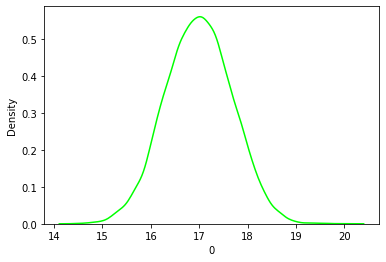

In [ ]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


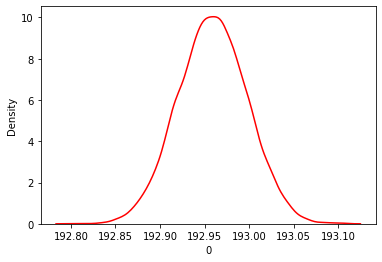

In [ ]:
sns.distplot(data_sample_d[0] , color = 'red' , hist=False)

In [35]:
M_r.to_csv("M_r_phot.csv") 